In [285]:
# Objectives: Use meteorological variables to predict air pollution
# Part 1: Use regression methods to predict the pollutants concentration time series
# Part 2: Use machine learning & classification schemes to predict extreme air pollution episode

%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [439]:
# import lib and set environments
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn import svm
import statsmodels.api as sm
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
np.set_printoptions(threshold=np.nan)

In [287]:
# import data
# Map
worldmap = sio.loadmat('/home/calvin/Research_work/map_data/world_map')
chinamap = sio.loadmat('/home/calvin/Research_work/map_data/China_map.mat')
# Air pollution data
obs = sio.loadmat('/home/calvin/Research_work/Atmospheric_stability/Finalise/obs.mat')
# Stability index
predictors = sio.loadmat('/home/calvin/Research_work/Atmospheric_stability/Finalise/daily_predictors_smooth.mat')
# Date
date = sio.loadmat('/home/calvin/Research_work/Atmospheric_stability/Finalise/DATE.mat')

In [288]:
# Create an index for the days in each month
x = np.arange(1,9126)
Mdate = date['DATE_l']
# Air pollution data available from 1998, but met data from WRF start from 1979
sample = np.where((Mdate[:,0,0] >= 1998))
sample_date = Mdate[sample,:,0]

#sample_date = Mdate[]
#Mdate.shape
#print(Mdate[:,:,0])

mday_all = []
for y in range(0,6):
    yr = y+1998
    for mth in range(0,12):
        mday = np.where((sample_date[0,:,0] == yr) & (sample_date[0,:,1] == mth+1))
        mday_all.append(mday)

np.shape(sample)

(1, 2190)

In [289]:
# Calculate standardise pollutants level by monthly mean

Pmean = []
Pmonth = np.empty((72,7,3))
Pmonth[:] = np.nan
Pollutant = obs['Pollutant']

# convert daily data into month data
for mth in range(0,np.size(mday_all)):
    for PN in range(0,7):
        for site in range(0,3):
            Pmean = np.nanmean(Pollutant[mday_all[mth],PN,site])
            Pmonth[mth,PN,site] = Pmean

# calculate monthly mean and standard deviation
PMEAN = np.empty((7,3))
PMEAN[:] = np.nan
PSTD = np.empty((7,3))
PSTD[:] = np.nan
for PN in range(0,7):
    for site in range(0,3):
        PMEAN[PN,site] = np.nanmean(Pmonth[:,PN,site])
        PSTD[PN,site] = np.nanstd(Pmonth[:,PN,site])

# Calculate standardised pollutant concentration
# standardised pollutant = (pollutant - mean) / std    

st_pollutant = np.empty((2190,7,3))
st_pollutant[:] = np.nan
for d in range(0,2190):
    for PN in range(0,7):
        for site in range(0,3):
            st_pollutant[d,PN,site] = (Pollutant[d,PN,site]-PMEAN[PN,site])/PSTD[PN,site]


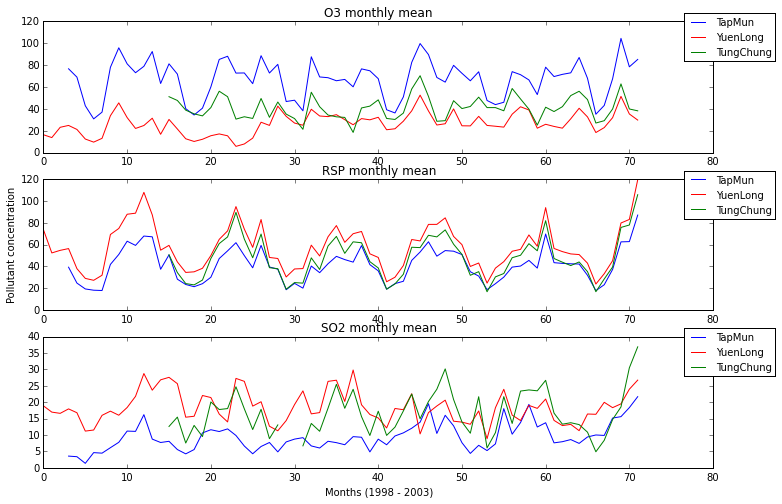

In [290]:
# Plot pollutant monthly mean
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.plot(Pmonth[:,4,0], color = 'blue', label = 'TapMun')
plt.plot(Pmonth[:,4,1], color = 'red', label = 'YuenLong')
plt.plot(Pmonth[:,4,2], color = 'green', label = 'TungChung')
plt.legend(prop={'size':10},bbox_to_anchor=(1.1, 1.1))
plt.title('O3 monthly mean')

plt.subplot(3,1,2)
plt.plot(Pmonth[:,5,0], color = 'blue', label = 'TapMun')
plt.plot(Pmonth[:,5,1], color = 'red', label = 'YuenLong')
plt.plot(Pmonth[:,5,2], color = 'green', label = 'TungChung')
plt.legend(prop={'size':10},bbox_to_anchor=(1.1, 1.1))
plt.title('RSP monthly mean')
plt.ylabel('Pollutant concentration')

plt.subplot(3,1,3)
plt.plot(Pmonth[:,6,0], color = 'blue', label = 'TapMun')
plt.plot(Pmonth[:,6,1], color = 'red', label = 'YuenLong')
plt.plot(Pmonth[:,6,2], color = 'green', label = 'TungChung')
plt.legend(prop={'size':10},bbox_to_anchor=(1.1, 1.1))
plt.title('SO2 monthly mean')
plt.xlabel('Months (1998 - 2003)')

# From the figures, the three air pollutants has similar trend but different scale.

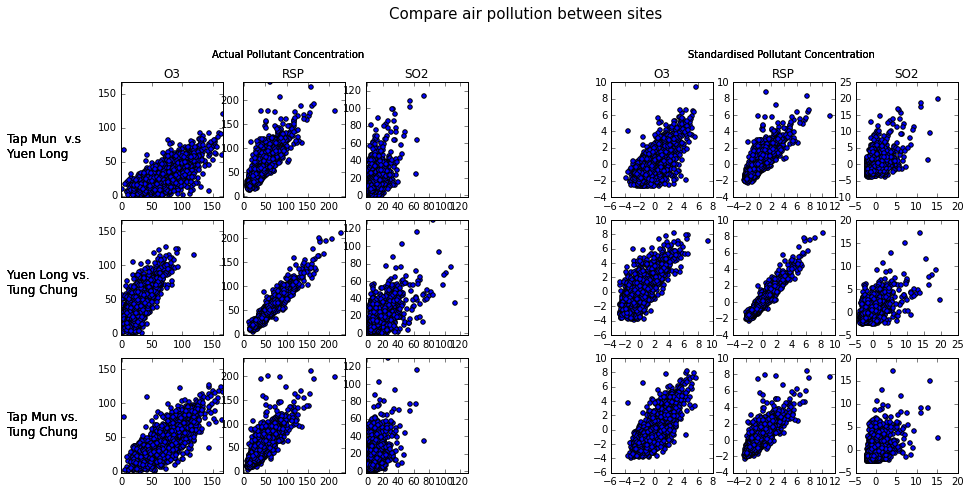

In [291]:
# Plot pollutants concentrate in sites
Pollutant = obs['Pollutant']
Pname = ['O3','RSP','SO2']
#print(predictors)
#Pollutant.shape

plt.figure(figsize=(15,7))
for PN in range(4,7):
    plt.subplot(3,7,PN-3)
    plt.scatter(Pollutant[:,PN,0],Pollutant[:,PN,1])
    maxP = np.nanmax(Pollutant[:,PN,:])
    plt.axis([-2,maxP,-2,maxP])
    plt.subplot(3,7,PN+4)
    plt.scatter(Pollutant[:,PN,1],Pollutant[:,PN,2])
    maxP = np.nanmax(Pollutant[:,PN,:])
    plt.axis([-2,maxP,-2,maxP])
    plt.subplot(3,7,PN+11)
    plt.scatter(Pollutant[:,PN,0],Pollutant[:,PN,2])
    maxP = np.nanmax(Pollutant[:,PN,:])
    plt.axis([-2,maxP,-2,maxP])

for PN in range(4,7):
    plt.subplot(3,7,PN+1)
    plt.scatter(st_pollutant[:,PN,0],st_pollutant[:,PN,1])
    #maxP = np.nanmax(st_pollutant[:,PN,:])
    #plt.axis([-2,maxP,-2,maxP])
    plt.subplot(3,7,PN+8)
    plt.scatter(st_pollutant[:,PN,1],st_pollutant[:,PN,2])
    #maxP = np.nanmax(st_pollutant[:,PN,:])
    #plt.axis([-2,maxP,-2,maxP])
    plt.subplot(3,7,PN+15)
    plt.scatter(st_pollutant[:,PN,0],st_pollutant[:,PN,2])
    #maxP = np.nanmax(st_pollutant[:,PN,:])
    #plt.axis([-2,maxP,-2,maxP])    
    
    plt.subplot(3,7,PN-3)
    plt.title(Pname[PN-4])
    plt.subplot(3,7,PN+1)
    plt.title(Pname[PN-4])
    #plt.axes().set_aspect('equal')
    plt.suptitle("Compare air pollution between sites",fontsize=15, y=1.05)
    plt.figtext(0.21,0.95,"Actual Pollutant Concentration")
    plt.figtext(0.65,0.95,"Standardised Pollutant Concentration")
    plt.figtext(0.02,0.75,'Tap Mun  v.s \nYuen Long',size='large')
    plt.figtext(0.02,0.48,'Yuen Long vs. \nTung Chung',size='large')
    plt.figtext(0.02,0.2,'Tap Mun vs. \nTung Chung',size='large')

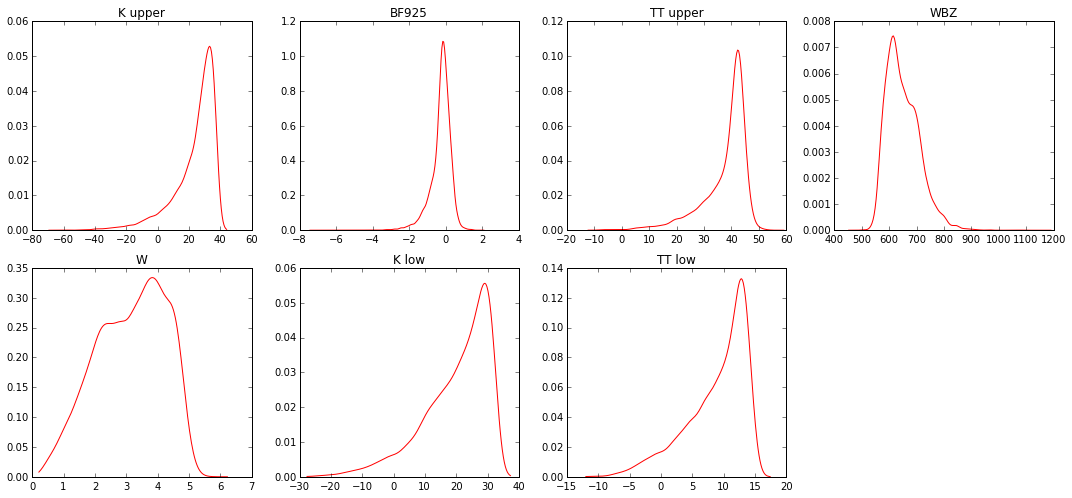

In [293]:
# Plot Predictors distributions
predictor_name = ['K upper', 'BF925', 'TT upper', 'WBZ', 'W', 'K low', 'TT low']
PreDs_CF = predictors['preDs_CF']
plt.figure(figsize=(15,7))
for var in range(0,7):
    plt.subplot(2,4,var+1) # for location (3,3)
    plt.tight_layout()
    data = PreDs_CF[var,3,3,:]
    data = data[~np.isnan(data)]
    kde = stats.gaussian_kde(data)
    x = np.linspace(data.min()-(data.min()*0.1), data.max()*1.1, 200)
    p = kde(x)
    plt.plot(x,p,color = 'red')
    plt.title(predictor_name[var])

In [299]:
# Create a classifier to separate Stable and NU conditions by filtering the stability index

PRED_sample1 = PreDs_CF[:,3,4,sample[0].T]
PRED_sample2 = PreDs_CF[:,3,3,sample[0].T]
PRED_sample3 = PreDs_CF[:,3,2,sample[0].T]
PRED_sample = (np.concatenate((PRED_sample1,PRED_sample2,PRED_sample3),axis=1)).T

# Pollutants sample
Poll_sample = np.concatenate((st_pollutant[:,4:7,0],st_pollutant[:,4:7,1],st_pollutant[:,4:7,2]),axis=0)

# Separate data into calibration (cal) and validation (val)
sample_t = np.arange(0, 6570, 1)
sample_v = np.arange(4, 6570, 4)
sample_c = np.delete(sample_t, (sample_v), axis=0)

PRED_c = PRED_sample[sample_c,:]
PRED_v = PRED_sample[sample_v,:]
POLL_c = Poll_sample[sample_c,:]
POLL_v = Poll_sample[sample_v,:]

# A quick scan on the correlation between pollutants and predictors
data = np.array([POLL_c[:,0],POLL_c[:,1],POLL_c[:,2],PRED_c[:,0],PRED_c[:,1],PRED_c[:,2],PRED_c[:,3],PRED_c[:,4],PRED_c[:,5],PRED_c[:,6]]).T
frame = pd.DataFrame(data, columns=['O3','RSP','SO2','K_up','BF925','TT_up','WBZ','W','K_low','TT_low'])
frame.corr()

,O3,RSP,SO2,K_up,BF925,TT_up,WBZ,W,K_low,TT_low
O3,1.000000,0.437999,-0.009225,-0.283778,0.135957,-0.248023,0.181715,-0.277822,-0.190549,-0.044761
RSP,0.437999,1.000000,0.533793,-0.546263,-0.040916,-0.547101,0.558745,-0.625748,-0.603618,-0.469249
SO2,-0.009225,0.533793,1.000000,-0.242048,0.031749,-0.235501,0.234800,-0.266214,-0.305559,-0.278470
K_up,-0.283778,-0.546263,-0.242048,1.000000,0.185482,0.866522,-0.855591,0.870698,0.784701,0.601531
BF925,0.135957,-0.040916,0.031749,0.185482,1.000000,0.322155,-0.385182,0.339735,0.400644,0.497042
TT_up,-0.248023,-0.547101,-0.235501,0.866522,0.322155,1.000000,-0.773681,0.808455,0.841708,0.661700
WBZ,0.181715,0.558745,0.234800,-0.855591,-0.385182,-0.773681,1.000000,-0.955332,-0.852766,-0.713448
W,-0.277822,-0.625748,-0.266214,0.870698,0.339735,0.808455,-0.955332,1.000000,0.894959,0.759520
K_low,-0.190549,-0.603618,-0.305559,0.784701,0.400644,0.841708,-0.852766,0.894959,1.000000,0.917214
TT_low,-0.044761,-0.469249,-0.278470,0.601531,0.497042,0.661700,-0.713448,0.759520,0.917214,1.000000


In [300]:
# Use Multiple Linear Regression to predict air pollution
# Since BF925 has rather low correlation with the pollutants, it is drop in the regression model
PRED_c[:,1] = 0

# O3
missing = np.isnan(POLL_c[:,0])
POLLn = POLL_c[~missing,0]
PREDn = PRED_c[~missing,:]
clfPN1 = linear_model.LinearRegression()
clfPN1.fit(PREDn,POLLn)

# RSP
missing = np.isnan(POLL_c[:,1])
POLLn = POLL_c[~missing,1]
PREDn = PRED_c[~missing,:]
clfPN2 = linear_model.LinearRegression()
clfPN2.fit(PREDn,POLLn)

# SO2
missing = np.isnan(POLL_c[:,2])
POLLn = POLL_c[~missing,2]
PREDn = PRED_c[~missing,:]
clfPN3 = linear_model.LinearRegression()
clfPN3.fit(PREDn,POLLn)

# Calibration sample
Pred_PN1_c = clfPN1.predict(PRED_c)*2
Pred_PN2_c = clfPN2.predict(PRED_c)*1.3
Pred_PN3_c = clfPN3.predict(PRED_c)*2.3

# Validation sample
Pred_PN1_v = clfPN1.predict(PRED_v)*2
Pred_PN2_v = clfPN2.predict(PRED_v)*1.3
Pred_PN3_v = clfPN3.predict(PRED_v)*2.3

#PreP1_nu = clfP1nu.predict(Predictor_nu)*coef_nu[0,PN-4]+coef_st[1,PN-4]

#POLLn.shape, PREDn.shape
#POLL_c[:,0].shape

# show model parameter: 
# clfPN1.coef_, clfPN1.intercept_ 

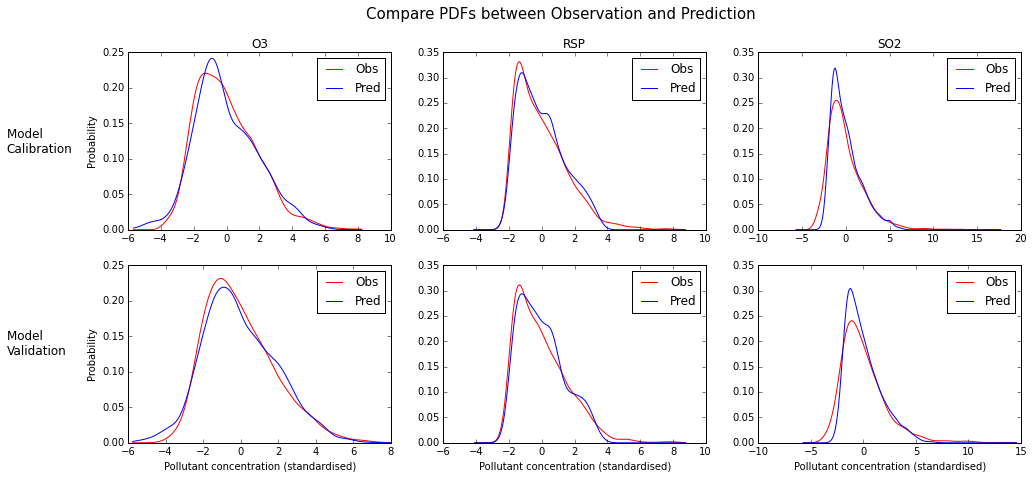

In [318]:
# PDFs plots between Observation and Prediction
plt.figure(figsize=(16,7))

# O3
plt.subplot(2,3,1)
PN = 0
missing = np.isnan(POLL_c[:,PN])
Polln = POLL_c[~missing,PN]
#Predn = Pred_PN1_c[~missing]
Predn = Pred_PN1_c
kdeO = stats.gaussian_kde(Polln)
kdeP = stats.gaussian_kde(Predn)
xx = np.linspace(np.percentile(Polln, 0.1)-2, np.percentile(Polln, 99.9)+1, 200)
pdfO = kdeO(xx)
pdfP = kdeP(xx)
plt.plot(xx,pdfO,color = 'red',label="Obs")  
plt.plot(xx,pdfP,color = 'blue',label="Pred")
plt.title('O3')
plt.ylabel('Probability')
plt.legend()

plt.subplot(2,3,4)
missing = np.isnan(POLL_v[:,PN])
Polln = POLL_v[~missing,PN]
#Predn = Pred_PN1_c[~missing]
Predn = Pred_PN1_v
kdeO = stats.gaussian_kde(Polln)
kdeP = stats.gaussian_kde(Predn)
xx = np.linspace(np.percentile(Polln, 0.1)-2, np.percentile(Polln, 99.9)+1, 200)
pdfO = kdeO(xx)
pdfP = kdeP(xx)
plt.plot(xx,pdfO,color = 'red',label="Obs")  
plt.plot(xx,pdfP,color = 'blue',label="Pred") 
plt.ylabel('Probability')
plt.xlabel('Pollutant concentration (standardised)')
plt.legend()
    
plt.subplot(2,3,2)
PN = 1
missing = np.isnan(POLL_c[:,PN])
Polln = POLL_c[~missing,PN]
#Predn = Pred_PN1_c[~missing]
Predn = Pred_PN2_c
kdeO = stats.gaussian_kde(Polln)
kdeP = stats.gaussian_kde(Predn)
xx = np.linspace(np.percentile(Polln, 0.1)-2, np.percentile(Polln, 99.9)+1, 200)
pdfO = kdeO(xx)
pdfP = kdeP(xx)
plt.plot(xx,pdfO,color = 'red',label="Obs")  
plt.plot(xx,pdfP,color = 'blue',label="Pred")
plt.title('RSP')
plt.legend()

plt.subplot(2,3,5)
missing = np.isnan(POLL_v[:,PN])
Polln = POLL_v[~missing,PN]
#Predn = Pred_PN1_c[~missing]
Predn = Pred_PN2_v
kdeO = stats.gaussian_kde(Polln)
kdeP = stats.gaussian_kde(Predn)
xx = np.linspace(np.percentile(Polln, 0.1)-2, np.percentile(Polln, 99.9)+1, 200)
pdfO = kdeO(xx)
pdfP = kdeP(xx)
plt.plot(xx,pdfO,color = 'red',label="Obs")  
plt.plot(xx,pdfP,color = 'blue',label="Pred") 
plt.xlabel('Pollutant concentration (standardised)')
plt.legend()

plt.subplot(2,3,3)
PN = 2
missing = np.isnan(POLL_c[:,PN])
Polln = POLL_c[~missing,PN]
#Predn = Pred_PN1_c[~missing]
Predn = Pred_PN3_c
kdeO = stats.gaussian_kde(Polln)
kdeP = stats.gaussian_kde(Predn)
xx = np.linspace(np.percentile(Polln, 0.1)-2, np.percentile(Polln, 99.9)+1, 200)
pdfO = kdeO(xx)
pdfP = kdeP(xx)
plt.plot(xx,pdfO,color = 'red',label="Obs")  
plt.plot(xx,pdfP,color = 'blue',label="Pred")
plt.title('SO2')
plt.legend()

plt.subplot(2,3,6)
missing = np.isnan(POLL_v[:,PN])
Polln = POLL_v[~missing,PN]
#Predn = Pred_PN1_c[~missing]
Predn = Pred_PN3_v
kdeO = stats.gaussian_kde(Polln)
kdeP = stats.gaussian_kde(Predn)
xx = np.linspace(np.percentile(Polln, 0.1)-2, np.percentile(Polln, 99.9)+1, 200)
pdfO = kdeO(xx)
pdfP = kdeP(xx)
plt.plot(xx,pdfO,color = 'red',label="Obs")  
plt.plot(xx,pdfP,color = 'blue',label="Pred") 
plt.xlabel('Pollutant concentration (standardised)')
plt.legend()

plt.figtext(0.02,0.7,'Model \nCalibration',size='large')
plt.figtext(0.02,0.3,'Model \nValidation',size='large')
plt.suptitle("Compare PDFs between Observation and Prediction",fontsize=15, y=0.99)

    #p80 = np.percentile(Polln, 80)
    #plt.plot([p80,p80],[0,0.4],color = 'blue')
    #plt.title(Pname[PN-4])


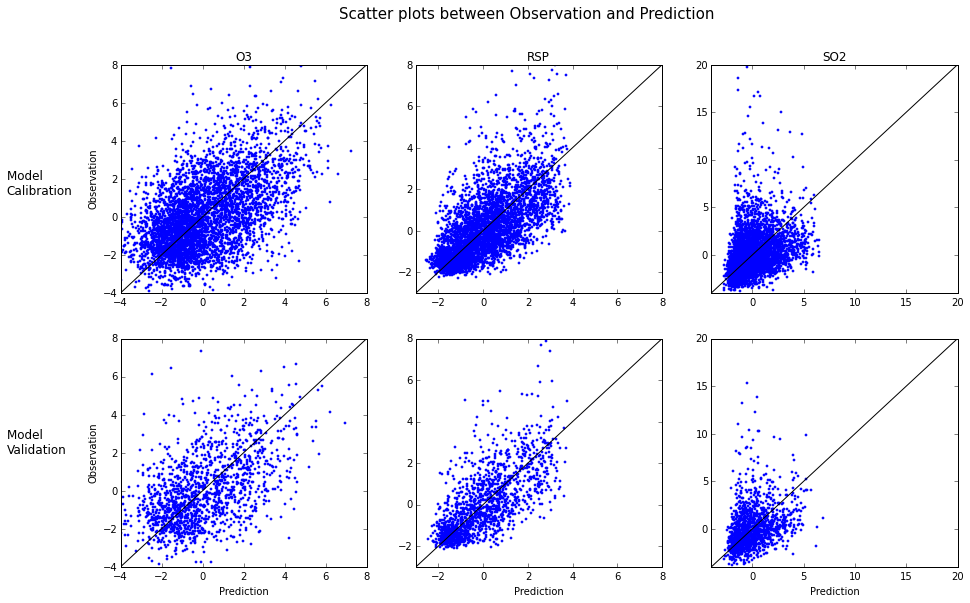

In [321]:
# Scatter plots between Observation and Prediction
plt.figure(figsize=(15,9))

plt.subplot(2,3,1)
plt.scatter(Pred_PN1_c,POLL_c[:,0], color ='blue',s = 3)
plt.plot([-10, 10],[-10, 10], color = 'black')
plt.axis([-4, 8, -4, 8])
plt.ylabel('Observation')
plt.title('O3')

plt.subplot(2,3,2)
plt.scatter(Pred_PN2_c,POLL_c[:,1], color ='blue',s = 3)
plt.plot([-10, 10],[-10, 10], color = 'black')
plt.axis([-3, 8, -3, 8])
plt.title('RSP')

plt.subplot(2,3,3)
plt.scatter(Pred_PN3_c,POLL_c[:,2], color ='blue',s = 3)
plt.plot([-10, 20],[-10, 20], color = 'black')
plt.axis([-4, 20, -4, 20])
plt.title('SO2')

plt.subplot(2,3,4)
plt.scatter(Pred_PN1_v,POLL_v[:,0], color ='blue',s = 3)
plt.plot([-10, 10],[-10, 10], color = 'black')
plt.axis([-4, 8, -4, 8])
plt.ylabel('Observation')
plt.xlabel('Prediction')

plt.subplot(2,3,5)
plt.scatter(Pred_PN2_v,POLL_v[:,1], color ='blue',s = 3)
plt.plot([-10, 10],[-10, 10], color = 'black')
plt.axis([-3, 8, -3, 8])
plt.xlabel('Prediction')

plt.subplot(2,3,6)
plt.scatter(Pred_PN3_v,POLL_v[:,2], color ='blue',s = 3)
plt.plot([-10, 20],[-10, 20], color = 'black')
plt.axis([-4, 20, -4, 20])
plt.xlabel('Prediction')

plt.figtext(0.02,0.7,'Model \nCalibration',size='large')
plt.figtext(0.02,0.3,'Model \nValidation',size='large')
plt.suptitle("Scatter plots between Observation and Prediction",fontsize=15, y=0.99)

In [376]:
# Extreme Classification (1) - SGDClassifier
# Define extreme condition when pollutants concentration reach over 95%ile

PN = 0
missing = np.isnan(POLL_c[:,PN])
POLLn = POLL_c[~missing,PN]
PREDn = PRED_c[~missing,:]
# Define a variable, COND_c, where 0 = normal, 1 = extreme
COND_c = np.zeros(np.size(POLLn))
COND_c[np.where(POLLn > np.percentile(Polln,95))] = 1 

clf = SGDClassifier()
clf.fit(PREDn,COND_c)
CLF_c = clf.predict(PREDn)

#print(np.percentile(Polln,95))
#print(COND_c)
#print(clf.coef_, clf.intercept_)
#plt.subplot(2,1,1)
#plt.plot(COND_c)
#plt.subplot(2,1,2)
#plt.plot(CLF_c)
R1 = np.where((COND_c == 1) & (CLF_c == 1))
R2 = np.where((COND_c == 0) & (CLF_c == 1))
R3 = np.where((COND_c == 1) & (CLF_c == 0))
R4 = np.where((COND_c == 0) & (CLF_c == 0))
r1, r2, r3, r4 = len(R1[0]), len(R2[0]), len(R3[0]), len(R4[0])
print(r1, r2, r3, r4)

0 0 224 4255


In [457]:
# Extreme Classification (1) - SVM
# Define extreme condition when pollutants concentration reach over 95%ile
# Model Calibration
PN = 0
missing = np.isnan(POLL_c[:,PN])
POLLn = POLL_c[~missing,PN]
PREDn = PRED_c[~missing,:]
Ext_PN1 = np.percentile(POLLn,95)
# Define a variable, COND_c, where 0 = normal, 1 = extreme
COND_PN1_c = np.zeros(np.size(POLLn))
COND_PN1_c[np.where(POLLn > Ext_PN1)] = 1 

clf_PN1 = svm.SVC()
clf_PN1.fit(PREDn,COND_PN1_c)
CLF_PN1_c = clf_PN1.predict(PREDn)

PN = 1
missing = np.isnan(POLL_c[:,PN])
POLLn = POLL_c[~missing,PN]
PREDn = PRED_c[~missing,:]
Ext_PN2 = np.percentile(POLLn,95)
# Define a variable, COND_c, where 0 = normal, 1 = extreme
COND_PN2_c = np.zeros(np.size(POLLn))
COND_PN2_c[np.where(POLLn > Ext_PN2)] = 1 

clf_PN2 = svm.SVC()
clf_PN2.fit(PREDn,COND_PN2_c)
CLF_PN2_c = clf_PN2.predict(PREDn)

PN = 2
missing = np.isnan(POLL_c[:,PN])
POLLn = POLL_c[~missing,PN]
PREDn = PRED_c[~missing,:]
Ext_PN3 = np.percentile(POLLn,95)
# Define a variable, COND_c, where 0 = normal, 1 = extreme
COND_PN3_c = np.zeros(np.size(POLLn))
COND_PN3_c[np.where(POLLn > Ext_PN3)] = 1 

clf_PN3 = svm.SVC()
clf_PN3.fit(PREDn,COND_PN3_c)
CLF_PN3_c = clf_PN3.predict(PREDn)

print(Ext_PN1,Ext_PN2,Ext_PN3)
#print(COND_c)
#print(clf.coef_, clf.intercept_)
#print(np.sum(COND_PN1_c), np.sum(COND_PN2_c), np.sum(COND_PN3_c))


3.32833634434 2.89073241359 3.93412726479


In [449]:
print(clf_PN1.coef0)

0.0


In [471]:
# Model Validation
PN = 0
missing = np.isnan(POLL_v[:,PN])
POLLn = POLL_v[~missing,PN]
PREDn = PRED_v[~missing,:]
# Define a variable, COND_c, where 0 = normal, 1 = extreme
COND_PN1_v = np.zeros(np.size(POLLn))
COND_PN1_v[np.where(POLLn > Ext_PN1)] = 1 
CLF_PN1_v = clf_PN1.predict(PREDn)

PN = 1
missing = np.isnan(POLL_v[:,PN])
POLLn = POLL_v[~missing,PN]
PREDn = PRED_v[~missing,:]
# Define a variable, COND_c, where 0 = normal, 1 = extreme
COND_PN2_v = np.zeros(np.size(POLLn))
COND_PN2_v[np.where(POLLn > Ext_PN2)] = 1 
CLF_PN2_v = clf_PN2.predict(PREDn)

PN = 2
missing = np.isnan(POLL_v[:,PN])
POLLn = POLL_v[~missing,PN]
PREDn = PRED_v[~missing,:]
# Define a variable, COND_c, where 0 = normal, 1 = extreme
COND_PN3_v = np.zeros(np.size(POLLn))
COND_PN3_v[np.where(POLLn > Ext_PN3)] = 1 
CLF_PN3_v = clf_PN3.predict(PREDn)

#print(np.sum(CLF_PN1_v),np.sum(CLF_PN2_v),np.sum(CLF_PN3_v))
np.sum(COND_PN2_v),Ext_PN2

(78.0, 2.8907324135904067)

In [506]:
# Classification result for model calibration
# O3
R1 = np.where((COND_PN1_c == 1) & (CLF_PN1_c == 1))
R2 = np.where((COND_PN1_c == 0) & (CLF_PN1_c == 1))
R3 = np.where((COND_PN1_c == 1) & (CLF_PN1_c == 0))
R4 = np.where((COND_PN1_c == 0) & (CLF_PN1_c == 0))
PN1_CR_c = [len(R1[0]), len(R2[0]), len(R3[0]), len(R4[0])]
# RSP
R1 = np.where((COND_PN2_c == 1) & (CLF_PN2_c == 1))
R2 = np.where((COND_PN2_c == 0) & (CLF_PN2_c == 1))
R3 = np.where((COND_PN2_c == 1) & (CLF_PN2_c == 0))
R4 = np.where((COND_PN2_c == 0) & (CLF_PN2_c == 0))
PN2_CR_c = [len(R1[0]), len(R2[0]), len(R3[0]), len(R4[0])]
# SO2
R1 = np.where((COND_PN3_c == 1) & (CLF_PN3_c == 1))
R2 = np.where((COND_PN3_c == 0) & (CLF_PN3_c == 1))
R3 = np.where((COND_PN3_c == 1) & (CLF_PN3_c == 0))
R4 = np.where((COND_PN3_c == 0) & (CLF_PN3_c == 0))
PN3_CR_c = [len(R1[0]), len(R2[0]), len(R3[0]), len(R4[0])]

# Classification result for model validation
# O3
R1 = np.where((COND_PN1_v == 1) & (CLF_PN1_v == 1))
R2 = np.where((COND_PN1_v == 0) & (CLF_PN1_v == 1))
R3 = np.where((COND_PN1_v == 1) & (CLF_PN1_v == 0))
R4 = np.where((COND_PN1_v == 0) & (CLF_PN1_v == 0))
PN1_CR_v = [len(R1[0]), len(R2[0]), len(R3[0]), len(R4[0])]
# RSP
R1 = np.where((COND_PN2_v == 1) & (CLF_PN2_v == 1))
R2 = np.where((COND_PN2_v == 0) & (CLF_PN2_v == 1))
R3 = np.where((COND_PN2_v == 1) & (CLF_PN2_v == 0))
R4 = np.where((COND_PN2_v == 0) & (CLF_PN2_v == 0))
PN2_CR_v = [len(R1[0]), len(R2[0]), len(R3[0]), len(R4[0])]
# SO2
R1 = np.where((COND_PN3_v == 1) & (CLF_PN3_v == 1))
R2 = np.where((COND_PN3_v == 0) & (CLF_PN3_v == 1))
R3 = np.where((COND_PN3_v == 1) & (CLF_PN3_v == 0))
R4 = np.where((COND_PN3_v == 0) & (CLF_PN3_v == 0))
PN3_CR_v = [len(R1[0]), len(R2[0]), len(R3[0]), len(R4[0])]

print(PN1_CR_c,PN2_CR_c,PN3_CR_c)

#      PN1_CR_v,PN2_CR_v,PN3_CR_v)

[119, 0, 105, 4255] [152, 0, 74, 4281] [67, 0, 154, 4184]


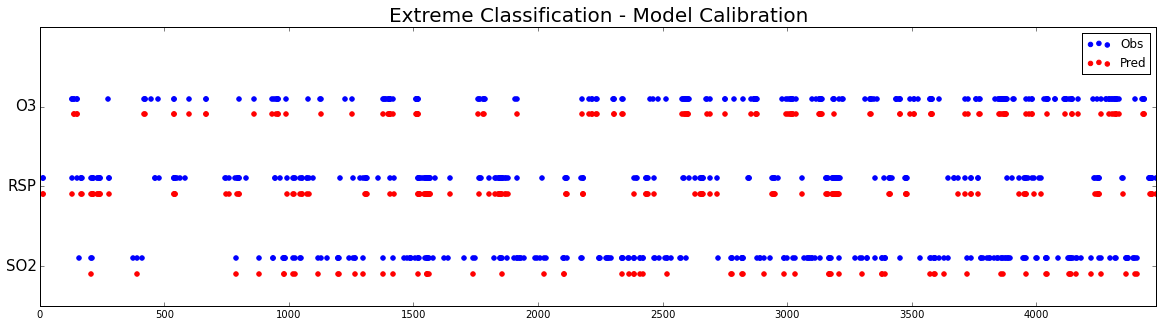

In [505]:

plt.figure(figsize=(20,5))
#fig, ax = plt.subplots()

# O3
plt.scatter([range(1,len(COND_PN1_c)+1)],COND_PN1_c*3.1, color = 'blue', label = 'Obs')
plt.scatter([range(1,len(CLF_PN1_c)+1)],CLF_PN1_c*2.9,color = 'red', label = 'Pred')

# RSP
plt.scatter([range(1,len(COND_PN2_c)+1)],COND_PN2_c*2.1, color = 'blue')
plt.scatter([range(1,len(CLF_PN2_c)+1)],CLF_PN2_c*1.9,color = 'red')

# SO2
plt.scatter([range(1,len(COND_PN3_c)+1)],COND_PN3_c*1.1, color = 'blue')
plt.scatter([range(1,len(CLF_PN3_c)+1)],CLF_PN3_c*0.9,color = 'red')

#print(len(COND_c), len(CLF_c))
plt.axis([0, len(COND_PN1_c), 0.5, 4])
y = [1,2,3]
labels = ['SO2','RSP','O3']
plt.yticks(y, labels, size = 15)
plt.legend()
plt.title('Extreme Classification - Model Calibration', size = 20)

In [ ]:
missing = np.isnan(Poll_sample[:,4:7]).any(1)
Polln = Poll_sample[~missing,:]
PREDn = PRED_sample[~missing,:]

[-6, 20, -6, 20]

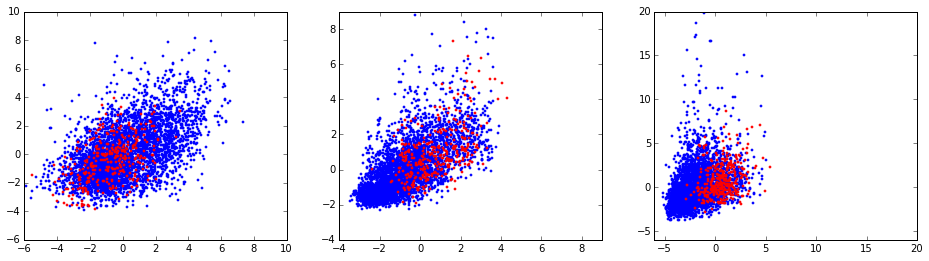

In [136]:
# Statistical model calibration

coef_nu = np.array([[2,1.4,2],[0,0,-0.1]])
coef_st = np.array([[2,1.5,2.7],[0,-0.7,-1.8]])
range_min = [-6, -4, -6]
range_max = [10, 9, 20]

missing = np.isnan(Poll_sample_c[:,4:7]).any(1)
Polln = Poll_sample_c[~missing,:]
PREDn = PRED_sample_c[~missing,:]

Fstab = np.where((PREDn[:,0] < 25) & 
                 (PREDn[:,1] < -0.7) &
                 (PREDn[:,2] < 35) &
                 (PREDn[:,3] < 3500) &
                 (PREDn[:,4] < 3) &
                 (PREDn[:,5] < 20) &
                 (PREDn[:,6] < 12))

Fall = np.arange(0, len(PREDn), 1)
Fnu = np.delete(Fall, (Fstab[0]), axis=0)

Predictor_nu = PREDn[Fnu,:]
Predictor_st = PREDn[Fstab[0],:]

PN = 4
clfP1nu = linear_model.LinearRegression()
OBS_nu = Polln[Fnu,PN]
clfP1nu.fit(Predictor_nu,OBS_nu)
clfP1st = linear_model.LinearRegression()
OBS_st = Polln[Fstab[0],PN]
clfP1st.fit(Predictor_st,OBS_st)

PN = 5
clfP2nu = linear_model.LinearRegression()
OBS_nu = Polln[Fnu,PN]
clfP2nu.fit(Predictor_nu,OBS_nu)
clfP2st = linear_model.LinearRegression()
OBS_st = Polln[Fstab[0],PN]
clfP2st.fit(Predictor_st,OBS_st)

PN = 6
clfP3nu = linear_model.LinearRegression()
OBS_nu = Polln[Fnu,PN]
clfP3nu.fit(Predictor_nu,OBS_nu)
clfP3st = linear_model.LinearRegression()
OBS_st = Polln[Fstab[0],PN]
clfP3st.fit(Predictor_st,OBS_st)

coef_nu = np.array([[2,1.4,2],[0,0,-0.1]])
coef_st = np.array([[2,1.5,2.7],[0,-0.7,-1.8]])
range_min = [-6, -4, -6]
range_max = [10, 9, 20]

plt.figure(figsize=(16,9))

PN = 4
plt.subplot(2,3,PN-3)
PreP1_nu = clfP1nu.predict(Predictor_nu)*coef_nu[0,PN-4]+coef_st[1,PN-4]
plt.scatter(PreP1_nu,Polln[Fnu,PN], color ='blue',s = 3)
plt.axis([range_min[PN-4],range_max[PN-4],range_min[PN-4],range_max[PN-4]])
PreP1_st = clfP1st.predict(Predictor_st)*coef_st[0,PN-4]+coef_st[1,PN-4]
plt.scatter(PreP1_st,Polln[Fstab,PN],color ='red',s = 3)
plt.axis([range_min[PN-4],range_max[PN-4],range_min[PN-4],range_max[PN-4]])

PN = 5
plt.subplot(2,3,PN-3)
PreP2_nu = clfP2nu.predict(Predictor_nu)*coef_nu[0,PN-4]+coef_st[1,PN-4]
plt.scatter(PreP2_nu,Polln[Fnu,PN], color ='blue',s = 3)
plt.axis([range_min[PN-4],range_max[PN-4],range_min[PN-4],range_max[PN-4]])
PreP2_st = clfP2st.predict(Predictor_st)*coef_st[0,PN-4]+coef_st[1,PN-4]
plt.scatter(PreP2_st,Polln[Fstab,PN],color ='red',s = 3)
plt.axis([range_min[PN-4],range_max[PN-4],range_min[PN-4],range_max[PN-4]])

PN = 6
plt.subplot(2,3,PN-3)
PreP3_nu = clfP3nu.predict(Predictor_nu)*coef_nu[0,PN-4]+coef_st[1,PN-4]
plt.scatter(PreP3_nu,Polln[Fnu,PN], color ='blue',s = 3)
plt.axis([range_min[PN-4],range_max[PN-4],range_min[PN-4],range_max[PN-4]])
PreP3_st = clfP3st.predict(Predictor_st)*coef_st[0,PN-4]+coef_st[1,PN-4]
plt.scatter(PreP3_st,Polln[Fstab,PN],color ='red',s = 3)
plt.axis([range_min[PN-4],range_max[PN-4],range_min[PN-4],range_max[PN-4]])

In [139]:
clfP1nu.coef_, clfP1nu.intercept_

(array([-0.01119857, -0.1087016 ,  0.02171866, -0.04020038, -2.4701607 ,
        -0.12724621,  0.32225218]), 33.048397046934276)

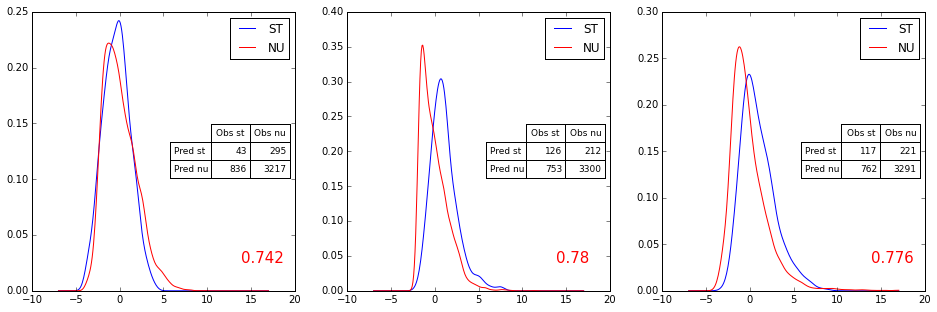

In [77]:
# Compare stable case with Pollutant's concentration
plt.figure(figsize=(16,5))
for i in range(0,3):
    PN = 4+i
    plt.subplot(1,3,i+1) 
    kdePs = stats.gaussian_kde(Polln_st[:,i])
    kdePn = stats.gaussian_kde(Polln_nu[:,i])
    xx = np.linspace(-7, 17, 300)
    #pdfO = kdeO(xx)
    pdfPs = kdePs(xx)
    pdfPn = kdePn(xx)  
    plt.plot(xx,pdfPs,color = 'blue',label="ST")
    plt.plot(xx,pdfPn,color = 'red',label="NU")
    plt.legend() 
    SC = np.empty(len(Polln))
    SC[(Polln[:,PN] < np.percentile(Polln[:,PN], 80))] = 0 # Neutral and unstable conditions
    SC[(Polln[:,PN] >= np.percentile(Polln[:,PN], 80))] = 1 # Stable condition
    YR = np.empty(len(Polln))
    YR[:] = 0
    YR[Fstab[0]] = 1
    Result = np.array([SC,YR]).T
    R1 = np.where((Result[:,0] == 1) & (Result[:,1] == 1))
    R2 = np.where((Result[:,0] == 0) & (Result[:,1] == 1))
    R3 = np.where((Result[:,0] == 1) & (Result[:,1] == 0))
    R4 = np.where((Result[:,0] == 0) & (Result[:,1] == 0))
    r1, r2, r3, r4 = len(R1[0]), len(R2[0]), len(R3[0]), len(R4[0])
    #print(len(R1[0]), len(R2[0]), len(R3[0]), len(R4[0]))
    col_labels=['Obs st','Obs nu']
    row_labels=['Pred st','Pred nu']
    table_vals=[[r1,r2],[r3,r4]]
    Rtable = plt.table(cellText=table_vals, colWidths = [0.1]*2, rowLabels=row_labels, colLabels=col_labels, loc='center right') 
    Rtable.set_fontsize(15)
    Rtable.scale(1.5, 1.5)
    plt.annotate(str(np.round_(metrics.accuracy_score(SC, YR), decimals=3)), xy=(0.8, 0.1), xycoords='axes fraction',color = 'red',size =15)

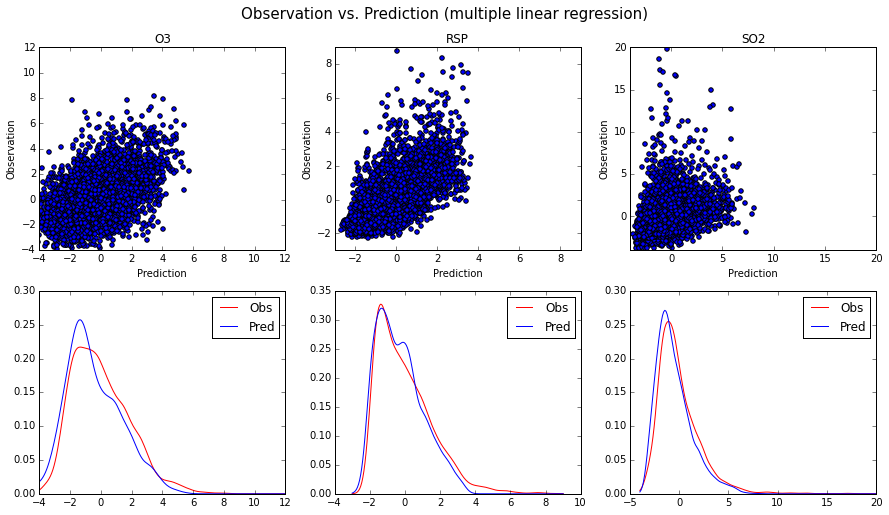

In [82]:
# Downscaling model (without separate into Stable and NU conditions)
clf = linear_model.LinearRegression()

coef1 = [1.9,1.2,2.3]
coef2 = [-0.5,-0.3,-0.5]
range_min = [-4, -3, -4]
range_max = [12, 9, 20]

plt.figure(figsize=(15,8))
for PN in range(4,7):
    Observation = Polln[:,PN]
    clf.fit(PREDn,Observation)
    #LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    #clf.coef_
    Prediction = clf.predict(PREDn)*coef1[PN-4]+coef2[PN-4]
    plt.subplot(2,3,PN-3)
    plt.scatter(Prediction,Observation)
    plt.title(Pname[PN-4])
    plt.axis([range_min[PN-4],range_max[PN-4],range_min[PN-4],range_max[PN-4]])
    plt.xlabel('Prediction')
    plt.ylabel('Observation')    
    
    plt.subplot(2,3,PN)
    kdeO = stats.gaussian_kde(Observation)
    kdeP = stats.gaussian_kde(Prediction)
    xx = np.linspace(range_min[PN-4],range_max[PN-4], 200)
    pdfO = kdeO(xx)
    pdfP = kdeP(xx)    
    plt.plot(xx,pdfO,color = 'red',label="Obs")    
    plt.plot(xx,pdfP,color = 'blue',label="Pred")
    plt.legend()
plt.suptitle("Observation vs. Prediction (multiple linear regression)",fontsize=15, y=0.97)    
